<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [0]:
# read in the data
import pandas as pd

yelp = pd.read_json('/content/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [5]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 826.9MB 1.1MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255076 sha256=fe72b5484424b642a8dc2817368ec399ef136efff13a971105f34f1ad47cf2af
  Stored in directory: /tmp/pip-ephem-wheel-cache-emlxmus3/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [0]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

STOPWORDS = set(STOPWORDS).union(set(['drinks', 'lunch', 'eat', 'love', 'got', 'food', 'great', 'good', 'place', 'like', 'service', 'time']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [141]:
tokenize(yelp['text'][0])

['beware',
 'fake',
 'fake',
 'fake',
 'small',
 'business',
 'los',
 'alamitos',
 'ca',
 'received',
 'looked',
 'legitimate',
 'account',
 'number',
 'called',
 'phone',
 'number',
 'listed',
 'wait',
 'hold',
 'said',
 'minutes',
 'leave',
 'message',
 'live',
 'person',
 'phone',
 'matter',
 'number',
 'selected',
 'left',
 'firm',
 'message',
 'contacting',
 'bbb',
 'attorney',
 'company',
 'trying',
 'scam',
 'businesses',
 'illegal']

In [142]:
# apply tokenize()
yelp['tokens'] = yelp['text'].apply(tokenize)
yelp['tokens'].head()

0    [beware, fake, fake, fake, small, business, lo...
1    [came, togo, quick, staff, friendly, complaint...
2    [ve, vegas, dozens, times, stepped, foot, circ...
3    [went, night, closed, street, party, best, act...
4    [stars, bad, price, seniors, pay, eating, hot,...
Name: tokens, dtype: object

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english')
sparse = tfidf.fit_transform(yelp['text'])

In [107]:
# Make into dataframe
v_yelp = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())
v_yelp.head()

,00,000,001695,007,00a,00am,00ish,00pm,01,011802,02,02022015,02pm,03,04,05,05pm,06,07,08,09,0d,0mph,10,100,1000,1001,100k,100lb,100s,100th,100x,101,102,1026,1030am,104,105,106,106lb,...,彼らは皆,待ち時間が長い,待ち時間長い,情報が保存された腕時計型のデバイスをつけてコースへ出ます,手振りと単語で理解できると思います,探したお店でした,旅行でラスベガスに来ましたがネイルがはげてるのが気になり,日本ではまだあまりないブラウンカラーのエクステをしてもらい,日本人,日本人の方も日本語が話せる方も居て,日本語を話せるスタッフはおりませんが,服務人員也很敬業,次にラスベガスを訪れたときもまた行きたい,滿足,漁膳房,特に女性には,現在はまだ仮設の建物での営業ですが,現在コース全体を見渡せるような建物を建築中です,紙でのレシートはもらえず,終わったら,結構,結構待ち時間はありますから,美味的味道,自分が乗りたい車のものを選びます,英語が得意でなくても,見学だけすることも可能です,視覚的に分かりやすく進めることができます,覺得店家很用心製作,言えばレシートももらえるかもしれません,誓約書にサイン,誰も乗車しなくても,豆腐花,質問にも丁寧に答えてくれましたし,車好きさんには,這是一個不錯的選擇,運転しない,運転中も英語で指導があります,食べ物はうまい,餐後點了甜點,３時間後の便
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

# Fit on Vectors
nn = NearestNeighbors(n_neighbors=10, algorithm='auto')
nn.fit(v_yelp)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [109]:
nn.kneighbors([v_yelp.iloc[0]])

(array([[0.        , 1.28246091, 1.29625505, 1.30062127, 1.30515772,
         1.31123683, 1.31277998, 1.31901052, 1.321382  , 1.33014107]]),
 array([[   0, 2131, 6019, 3276, 8470, 2943, 9036, 2621, 3714, 2207]]))

In [110]:
yelp['text'][9]

'Wow. I walked in and sat at the bar for 10 minutes. All the bartenders working and not one even said "Be right with you". And I was sitting next to the waitress station. The bartenders would chat with the waitresses and ignore me. I finally got a bartender\'s attention after about 15 minutes. Not that busy. I don\'t understand. I don\'t think I\'ll return. I\'ve been to many bars, many of the Stations casino\'s bars and I\'ve never seen service like this.'

In [0]:
fake_text = ['Wow. I walked in and sat at the bar for 10 minutes. All the bartenders working and not one even said "Be right with you". And I was sitting next to the waitress station. The bartenders would chat with the waitresses and ignore me. I finally got a bartender\'s attention after about 15 minutes. Not that busy. I don\'t understand. I don\'t think I\'ll return. I\'ve been to many bars, many of the Stations casino\'s bars and I\'ve never seen service like this.']

In [0]:
sparse_fake = tfidf.transform(fake_text)
fake = sparse_fake.todense()

In [113]:
nn.kneighbors(fake)

(array([[0.        , 1.23034778, 1.23147403, 1.23853802, 1.26181747,
         1.26976867, 1.2709768 , 1.2810479 , 1.28237866, 1.28257222]]),
 array([[   9,  610, 6528, 9122, 5396, 9336, 1739, 9957, 3415, 3863]]))

In [114]:
for x in nn.kneighbors(fake)[1]:
    print(yelp['text'][x][:100])

9       Wow. I walked in and sat at the bar for 10 min...
610     Don't sit at the yellow bar!! Bartender walked...
6528    TERRIBLE SERVICE!! They made us sit at the bar...
9122    I usually only write positive Yelp reviews as ...
5396    Beer is Ice Cold, food is ok...but the bartend...
9336    I wish I could give this place negative stars....
1739    Very disappointed last night. My family of fou...
9957    This was the most awful meal and service we ex...
3415    Be careful at the bar because the bartenders a...
3863    This is the only Jack in the Box that has been...
Name: text, dtype: object


## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [116]:
yelp.dtypes

business_id            object
cool                    int64
date           datetime64[ns]
funny                   int64
review_id              object
stars                   int64
text                   object
useful                  int64
user_id                object
tokens                 object
dtype: object

In [0]:
tfidf_vect = TfidfVectorizer(stop_words='english', max_features=1825, max_df=0.9)
mnb = MultinomialNB()

nb_pipe = Pipeline([('vect', tfidf_vect), ('clf', mnb)])

In [118]:
nb_pipe.fit(yelp['text'], yelp['stars'])

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=1825,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
pred = nb_pipe.predict(fake_text)

In [120]:
pred

array([1])

#### Grid search

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
parameters = {
    'vect__max_df': (.6, .7, .8),
    'vect__min_df': (10, 20, 30),
    'vect__max_features': (500, 1000, 1500, 2000)
}

In [123]:
grid_search = GridSearchCV(nb_pipe, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(yelp['text'], yelp['stars'])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.9,
                                                        max_features=1825,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

In [124]:
grid_search.best_params_

{'vect__max_df': 0.6, 'vect__max_features': 2000, 'vect__min_df': 30}

In [0]:
grid_pred = grid_search.predict(fake_text)

In [126]:
grid_pred

array([1])

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

### Estimate LDA topic model

In [0]:
#imports
import numpy as np
import gensim
import os
import re

from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [129]:
yelp['tokens'].head()

0    [beware, fake, fake, fake, small, business, lo...
1    [came, lunch, togo, quick, staff, friendly, co...
2    [ve, vegas, dozens, times, stepped, foot, circ...
3    [went, night, closed, street, party, best, act...
4    [stars, bad, price, lunch, seniors, pay, eatin...
Name: tokens, dtype: object

Learn the vocubalary of the yelp data:

In [0]:
id2word = corpora.Dictionary(yelp['tokens'])

In [0]:
id2word.filter_extremes(no_below=30, no_above=0.75)

Create a bag of words representation of the entire corpus

In [0]:
corpus = [id2word.doc2bow(text) for text in yelp['tokens']]

Your LDA model should be ready for estimation: 

In [0]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10,
                   )

In [97]:
lda.print_topics()

[(0,
  '0.006*"nice" + 0.006*"staff" + 0.006*"ve" + 0.005*"love" + 0.005*"delicious" + 0.005*"friendly" + 0.005*"come" + 0.005*"ordered" + 0.005*"people" + 0.005*"order"'),
 (1,
  '0.006*"staff" + 0.006*"nice" + 0.005*"best" + 0.005*"friendly" + 0.005*"ve" + 0.005*"came" + 0.005*"try" + 0.005*"menu" + 0.004*"way" + 0.004*"people"'),
 (2,
  '0.007*"order" + 0.006*"ve" + 0.005*"nice" + 0.005*"love" + 0.005*"staff" + 0.005*"pretty" + 0.004*"come" + 0.004*"came" + 0.004*"friendly" + 0.004*"people"'),
 (3,
  '0.008*"best" + 0.005*"restaurant" + 0.004*"nice" + 0.004*"staff" + 0.004*"come" + 0.004*"ve" + 0.004*"going" + 0.004*"day" + 0.004*"chicken" + 0.004*"people"'),
 (4,
  '0.005*"love" + 0.005*"ve" + 0.005*"delicious" + 0.005*"ordered" + 0.005*"went" + 0.005*"nice" + 0.004*"right" + 0.004*"order" + 0.004*"know" + 0.004*"pretty"'),
 (5,
  '0.008*"best" + 0.007*"definitely" + 0.006*"come" + 0.006*"ve" + 0.006*"love" + 0.006*"people" + 0.005*"ordered" + 0.005*"friendly" + 0.005*"amazing" + 0

In [0]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words if t[0]!='a']

In [101]:
num = 1
for t in topics:
    print(t)
    print("\n")

nice staff ve love delicious


staff nice best friendly ve


order ve nice love staff


best restaurant nice staff come


love ve delicious ordered went


best definitely come ve love


ve went nice amazing staff


love best came order nice


ve chicken little try new


ordered best love ve went




Create 1-2 visualizations of the results

In [49]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=013d13e69adbd186245b0eda517a4eb35fa407283aa3acd18eb0daaef943e089
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [0]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [51]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.006274 -0.003084       1        1  10.137465
0     -0.000395  0.004024       2        1  10.126082
1     -0.002307  0.000188       3        1  10.056802
6     -0.003579  0.000856       4        1  10.041348
9      0.002164 -0.002611       5        1  10.018275
7      0.001456  0.002316       6        1   9.943917
8     -0.001076 -0.000627       7        1   9.938736
2      0.002269  0.004117       8        1   9.921423
4     -0.001342 -0.000589       9        1   9.909306
3     -0.003464 -0.004590      10        1   9.906637, topic_info=     Category         Freq        Term        Total  loglift  logprob
88    Default  1835.000000        best  1835.000000  30.0000  30.0000
293   Default   797.000000       pizza   797.000000  29.0000  29.0000
268   Default  1454.000000  definitely  1454.000000  28.0000  28.0000
521   Default  1659.000000        love  1659.000000  27.0000  27.0000
23    Default  1393.000000    friendly  1393.000000  26.0000  26.0000
144   Default  1372.000000     amazing  1372.000000  25.0000  25.0000
116   Default  1072.000000      pretty  1072.000000  24.0000  24.0000
288   Default  1517.000000       order  1517.000000  23.0000  23.0000
269   Default  1244.000000   delicious  1244.000000  22.0000  22.0000
817   Default  1551.000000     ordered  1551.000000  21.0000  21.0000
28    Default  1572.000000       staff  1572.000000  20.0000  20.0000
710   Default  1171.000000         new  1171.000000  19.0000  19.0000
445   Default   790.000000        wasn   790.000000  18.0000  18.0000
83    Default  1499.000000        went  1499.000000  17.0000  17.0000
20    Default   988.000000        wait   988.000000  16.0000  16.0000
357   Default  1228.000000        know  1228.000000  15.0000  15.0000
18    Default   807.000000       small   807.000000  14.0000  14.0000
328   Default   834.000000    customer   834.000000  13.0000  13.0000
825   Default  1408.000000     chicken  1408.000000  12.0000  12.0000
21    Default  1504.000000        came  1504.000000  11.0000  11.0000
262   Default  1465.000000        come  1465.000000  10.0000  10.0000
99    Default  1029.000000         bar  1029.000000   9.0000   9.0000
13    Default   919.000000     minutes   919.000000   8.0000   8.0000
117   Default   915.000000       price   915.000000   7.0000   7.0000
642   Default   727.000000       happy   727.000000   6.0000   6.0000
172   Default  1123.000000         way  1123.000000   5.0000   5.0000
874   Default   670.000000       salad   670.000000   4.0000   4.0000
529   Default   477.000000     special   477.000000   3.0000   3.0000
396   Default   949.000000        work   949.000000   2.0000   2.0000
514   Default   625.000000       drink   625.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
65    Topic10   120.557739       night   986.095398   0.2103  -5.6450
575   Topic10    88.565598       store   707.020447   0.2346  -5.9534
329   Topic10   141.850830         day  1222.235718   0.1583  -5.4823
465   Topic10   158.930710  restaurant  1395.767578   0.1392  -5.3686
200   Topic10    65.188751     getting   500.017609   0.2746  -6.2598
99    Topic10   119.564362         bar  1029.709717   0.1588  -5.6532
710   Topic10   130.864655         new  1171.215210   0.1203  -5.5629
172   Topic10   125.760078         way  1123.333740   0.1223  -5.6027
1234  Topic10    77.583649         car   623.309448   0.2283  -6.0857
262   Topic10   150.858704        come  1465.440674   0.0384  -5.4208
967   Topic10    73.844650       fries   602.195984   0.2133  -6.1351
276   Topic10   104.254898       fresh   948.637390   0.1038  -5.7903
231   Topic10   111.879379        want  1042.892944   0.0796  -5.7197
183   Topic10   116.777893       right  1106.640137   0.0632  -5.6768
28    Topic10   151.511078       staff  1572.504761  -0.0278  -5.4164
825   Topic10   138

In [0]:
from collections import Counter

def count(docs):
    
    word_counts = Counter()
    appears_in = Counter()
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns=['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    
    total = wc['count'].sum()
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    total_docs = len(docs)
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [53]:
wc = count(yelp['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
66,ve,1466,1924,1.0,0.004300,0.004300,0.1466
75,nice,1429,1748,2.0,0.003906,0.008206,0.1429
124,best,1482,1746,3.0,0.003902,0.012108,0.1482
709,love,1344,1685,4.0,0.003766,0.015874,0.1344
35,staff,1380,1597,5.0,0.003569,0.019443,0.1380


In [55]:
pip install squarify

In [0]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

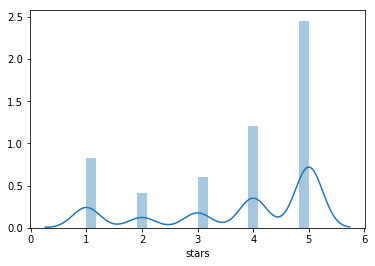

In [57]:
sns.distplot(yelp['stars']);

In [0]:
wc_1 = count(yelp[yelp['stars'] == 1]['tokens'])
wc_top20_1 = wc_1[wc_1['rank'] <= 20]

wc_2 = count(yelp[yelp['stars'] == 2]['tokens'])
wc_top20_2 = wc_2[wc_2['rank'] <= 20]

wc_3 = count(yelp[yelp['stars'] == 3]['tokens'])
wc_top20_3 = wc_3[wc_3['rank'] <= 20]

wc_4 = count(yelp[yelp['stars'] == 4]['tokens'])
wc_top20_4 = wc_4[wc_4['rank'] <= 20]

wc_5 = count(yelp[yelp['stars'] == 4]['tokens'])
wc_top20_5 = wc_5[wc_5['rank'] <= 20]

Top 20 words in each rating


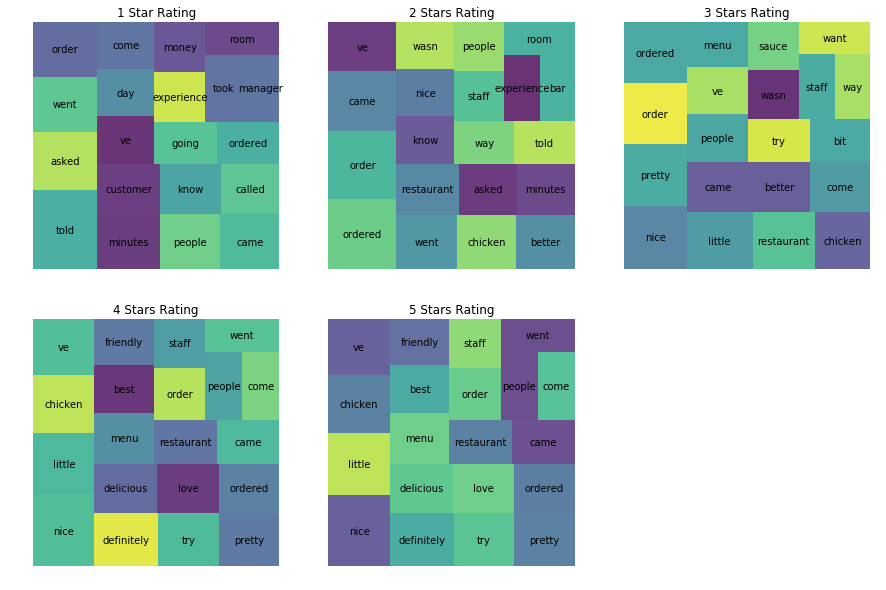

In [59]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
print('Top 20 words in each rating')
# axis = axis.flatten()
squarify.plot(sizes=wc_top20_1['pct_total'], label=wc_top20_1['word'], alpha=.8, ax=ax[0][0])
ax[0][0].set_title("1 Star Rating")
ax[0][0].axis('off')
squarify.plot(sizes=wc_top20_2['pct_total'], label=wc_top20_2['word'], alpha=.8, ax=ax[0][1])
ax[0][1].set_title("2 Stars Rating")
ax[0][1].axis('off')
squarify.plot(sizes=wc_top20_3['pct_total'], label=wc_top20_3['word'], alpha=.8, ax=ax[0][2])
ax[0][2].set_title("3 Stars Rating")
ax[0][2].axis('off')
squarify.plot(sizes=wc_top20_4['pct_total'], label=wc_top20_4['word'], alpha=.8, ax=ax[1][0])
ax[1][0].set_title("4 Stars Rating")
ax[1][0].axis('off')
squarify.plot(sizes=wc_top20_5['pct_total'], label=wc_top20_5['word'], alpha=.8, ax=ax[1][1])
ax[1][1].set_title("5 Stars Rating")
ax[1][1].axis('off')
ax[1][2].set_visible(False)
plt.show()

In [0]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #stream = doc_stream(path)
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=yelp['tokens'], 
                                        dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6)

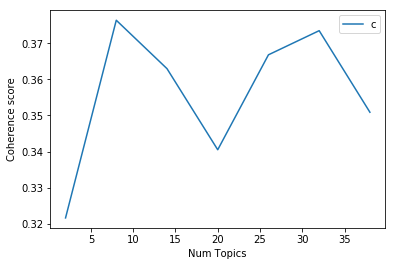

In [80]:
# Show graph
import matplotlib.pyplot as plt

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### Topic model results

The topic modeling turned out fairly well since most of the reviews are related with restaurants. All reviews from 2-5 stars got word "nice" which it can be indication of place has something good about it while only 1 star reviews mentioned word "customer" and "manager" due to bad service. 

4-5 stars shows same tokens and 3 stars review shows some overlap tokens with 4-5 starts but the word "better" mentioned there that the place can do better at some point.

The model has lots of overlaps tokens and 3-5 stars reviews shows fairly similar tokens while 1-2 stars different tokens from it

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)